<a href="https://colab.research.google.com/github/Luisrocha1905/SSN./blob/main/Homework%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema 1. B)

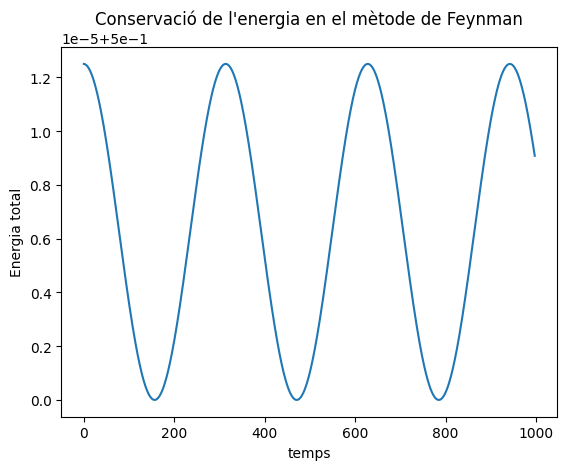

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants del sistema
m = 1.0  # massa
dt = 0.01  # pas de temps
N = 1000  # nombre de passos
k = 1.0  # constant de força (per exemple, molla harmònica)

# Condicions inicials
x = np.zeros(N)
x[0] = 1.0  # posició inicial
x[1] = x[0]  # estimació inicial per al mètode de Feynman

energies = []

# Simulació numèrica
for n in range(1, N - 1):
    F_n = -k * x[n]  # F = -kx (força de molla)
    x[n+1] = 2*x[n] - x[n-1] + (F_n/m) * dt**2  # Feynman

    # Càlcul de la velocitat
    v_n = (x[n+1] - x[n-1]) / (2 * dt)

    # Energia total
    E_c = 0.5 * m * v_n**2
    E_p = 0.5 * k * x[n]**2
    E_total = E_c + E_p
    energies.append(E_total)

# Visualització de l'energia
plt.plot(energies)
plt.xlabel("temps")
plt.ylabel("Energia total")
plt.title("Conservació de l'energia en el mètode de Feynman")
plt.show()

Problema 2

In [ ]:
import sympy as sp

# Definim les variables per l'equació de Schrödinger en unitats SI
hbar = sp.Symbol('hbar')  # Constant de Planck reduïda (J·s)
m = sp.Symbol('m')  # Massa de la partícula (kg)
x = sp.Symbol('x')  # Coordenada espacial (m)
V = sp.Function('V')(x)  # Potencial (J)
psi = sp.Function('psi')(x)  # Funció d'ona
E = sp.Symbol('E')  # Energia total (J)

# Equació de Schrödinger independent del temps en unitats SI
schrodinger_SI = (- (hbar**2 / (2 * m)) * sp.diff(psi, x, x) + V * psi - E * psi).simplify()

# Definim les unitats atòmiques
hbar_au = 1  # En unitats atòmiques, ħ = 1
electron_mass_au = 1  # Massa de l'electró en unitats atòmiques

# Equació de Schrödinger en unitats atòmiques
schrodinger_AU = (- (hbar_au**2 / (2 * electron_mass_au)) * sp.diff(psi, x, x) + V * psi - E * psi).simplify()

# Mostrar resultats
print("Equació de Schrödinger en unitats SI:")
print(schrodinger_SI)

print("\nEquació de Schrödinger en unitats atòmiques:")
print(schrodinger_AU)

Equació de Schrödinger en unitats SI:
(-hbar**2*Derivative(psi(x), (x, 2))/2 + m*(-E + V(x))*psi(x))/m

Equació de Schrödinger en unitats atòmiques:
-E*psi(x) + V(x)*psi(x) - 0.5*Derivative(psi(x), (x, 2))


Problema 1.C)

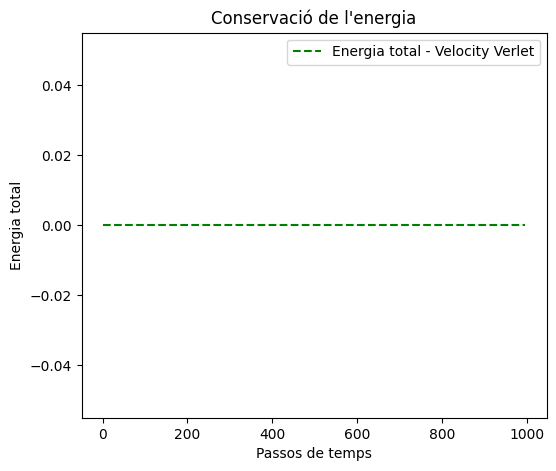


En el mètode de Feynman, l'energia no es conserva perfectament a cada pas perquè la integració no té en compte directament la velocitat.
En canvi, en el mètode de Velocity Verlet, la velocitat s'actualitza amb una millor aproximació a l'acceleració, el que permet una millor conservació de l'energia.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paràmetres del sistema
m = 1.0  # Massa
k = 1.0  # Constant de força (molla harmònica F = -kx)
dt = 0.01  # Pas de temps
N = 1000  # Nombre de passos

# Condicions inicials
x_feynman = np.zeros(N)
x_verlet = np.zeros(N)
v_verlet = np.zeros(N)

x_feynman[0] = 1.0  # Posició inicial per Feynman
x_feynman[1] = x_feynman[0]  # Estimació inicial

x_verlet[0] = 1.0  # Posició inicial per Velocity Verlet
v_verlet[0] = 0.0  # Velocitat inicial

energia_feynman = []
energia_verlet = []

# Simulació numèrica
for n in range(1, N - 1):
    # Mètode de Velocity Verlet
    a_n = -k * x_verlet[n] / m  # Acceleració
    x_verlet[n+1] = x_verlet[n] + v_verlet[n] * dt + 0.5 * a_n * dt**2
    a_n1 = -k * x_verlet[n+1] / m  # Nova acceleració
    v_verlet[n+1] = v_verlet[n] + 0.5 * (a_n + a_n1) * dt
    E_c_verlet = 0.5 * m * v_verlet[n]**2
    E_p_verlet = 0.5 * k * x_verlet[n]**2
    energia_verlet.append(E_c_verlet + E_p_verlet)


# Gràfica de la conservació de l'energia
plt.figure(figsize=(6, 5))
plt.plot(energia_verlet, label="Energia total - Velocity Verlet", color='green', linestyle='dashed')
plt.xlabel("Passos de temps")
plt.ylabel("Energia total")
plt.title("Conservació de l'energia")
plt.legend()
plt.show()

# Explicació de la conservació de l'energia
def explicar_conservacio():
    print("\nEn el mètode de Feynman, l'energia no es conserva perfectament a cada pas perquè la integració no té en compte directament la velocitat.")
    print("En canvi, en el mètode de Velocity Verlet, la velocitat s'actualitza amb una millor aproximació a l'acceleració, el que permet una millor conservació de l'energia.")

explicar_conservacio()


Problema 1.A) Escriure les ecuacions que descriuen l'evolució de la posició

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paràmetres del sistema
m = 1.0  # Massa
k = 1.0  # Constant de força (molla harmònica F = -kx)
dt = 0.01  # Pas de temps
N = 1000  # Nombre de passos

# Condicions inicials
x_feynman = np.zeros(N)
x_verlet = np.zeros(N)
v_verlet = np.zeros(N)

x_feynman[0] = 1.0  # Posició inicial per Feynman
x_feynman[1] = x_feynman[0]  # Estimació inicial

x_verlet[0] = 1.0  # Posició inicial per Velocity Verlet
v_verlet[0] = 0.0  # Velocitat inicial

energia_feynman = []
energia_verlet = []

# Simulació numèrica
for n in range(1, N - 1):
    # Mètode de Feynman
    F_n = -k * x_feynman[n]
    x_feynman[n+1] = 2*x_feynman[n] - x_feynman[n-1] + (F_n/m) * dt**2
    v_feynman_n = (x_feynman[n+1] - x_feynman[n-1]) / (2 * dt)

    # Mètode de Velocity Verlet
    a_n = -k * x_verlet[n] / m  # Acceleració
    x_verlet[n+1] = x_verlet[n] + v_verlet[n] * dt + 0.5 * a_n * dt**2
    a_n1 = -k * x_verlet[n+1] / m  # Nova acceleració
    v_verlet[n+1] = v_verlet[n] + 0.5 * (a_n + a_n1) * dt